In [1]:
import numpy as np

from common.array import GradArray
from common.layer import Layer, Linear
from common.loss import MSE
from common.optimizer import SGD
from common.activation import Sigmoid, Tanh

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
class LogisticClassifier(Layer): 
    def __init__(self) -> None:
        self.fc1 = Linear(2, 100)
        self.act1 = Sigmoid()
        self.fc2 = Linear(100, 1)
        self.act2 = Sigmoid()
        
    def forward(self, x: GradArray) -> GradArray: 
        return self.act2(self.fc2(self.act1(self.fc1(x))))

In [3]:
class TanhClassifier(Layer): 
    def __init__(self) -> None:
        self.fc1 = Linear(2, 100)
        self.act1 = Tanh()
        self.fc2 = Linear(100, 1)
        self.act2 = Tanh()
        
    def forward(self, x: GradArray) -> GradArray: 
        return (self.act2(self.fc2(self.act1(self.fc1(x)))) + 1) / 2

Logistic | Tanh
:---------:|:-------:
![](../figure/logistic_binary_classifier.jpg) | ![](../figure/tanh_binary_classifier.jpg)

These graphs can be generated by running the following command in the terminal:

```py
from common.graph import backward_graph

out_graph = backward_graph(out)
out_graph.dot_graph_show()
```

This code shows the computational graph of the output of the model in pdf format. 

# OR classifier

In [4]:
x = GradArray(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), name='x')
y = GradArray(np.array([[0], [1], [1], [1]]), name='y') # OR operation

## Logistic Classification

In [5]:
logistic_or_network = LogisticClassifier()
loss = MSE()
optim = SGD(logistic_or_network.get_params(), lr=1e-2)
n_epoch = 1000

In [6]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = logistic_or_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

100%|██████████| 1000/1000 [00:00<00:00, 4191.78it/s]


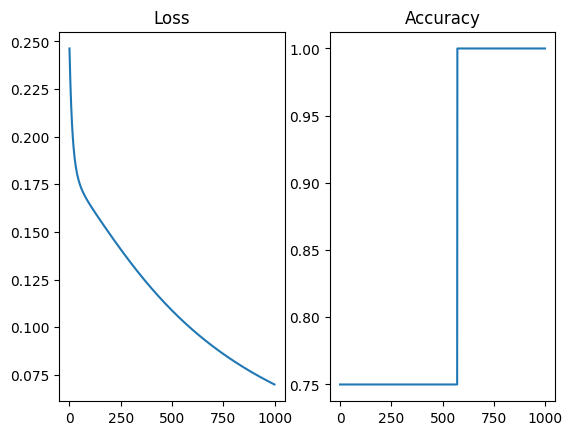

In [7]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(*zip(*acc_list))
plt.show()

## Tanh Classification

In [8]:
tanh_or_network = TanhClassifier()
loss = MSE()
optim = SGD(tanh_or_network.get_params(), lr=1e-2)
n_epoch = 1000

In [9]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = tanh_or_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 4537.25it/s]


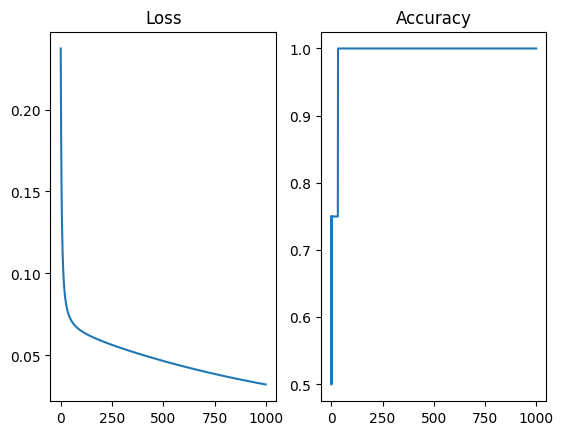

In [10]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(*zip(*acc_list))
plt.show()

# XOR Classifier

In [11]:
x = GradArray(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), name='x')
y = GradArray(np.array([[0], [1], [1], [0]]), name='y') # OR operation

## Logistic Classification

In [12]:
logistic_xor_network = LogisticClassifier()
loss = MSE()
optim = SGD(logistic_xor_network.get_params(), lr=1e-2)
n_epoch = 1000

In [13]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = logistic_xor_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 3866.63it/s]


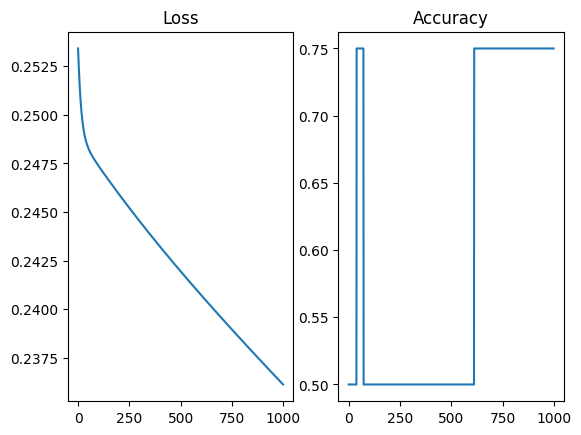

In [14]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(*zip(*acc_list))
plt.show()

## Tanh Classification

In [15]:
tanh_xor_network = TanhClassifier()
loss = MSE()
optim = SGD(tanh_xor_network.get_params(), lr=1e-2)
n_epoch = 1000

In [16]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = tanh_xor_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

100%|██████████| 1000/1000 [00:00<00:00, 3944.34it/s]


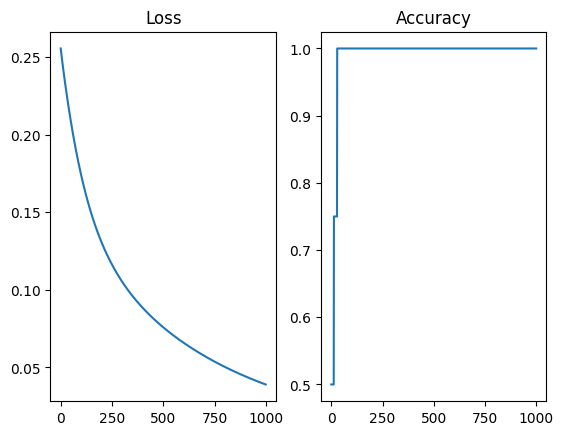

In [17]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(*zip(*acc_list))
plt.show()